In [ ]:
#Hoang Dieu Linh 
#ID 1120227

# Exercise 2

[7924754.16918083]
[7624773.94282294]
[7402835.9568663]
[7238635.19381769]
[7117149.59236285]
[7027265.52867931]
[6960760.91979959]
[6911552.90297762]
[6875141.25371626]
[6848196.61520277]
[6828255.86214338]
[6813496.7247863]
[6802571.05123006]
[6794481.45151766]
[6788490.03645036]
[6784050.90072223]
[6780760.17258185]
[6778319.05956501]
[6776506.50898267]
[6775158.98159881]
[6774155.48778948]
[6773406.51699158]
[6772845.84748589]
[6772424.48710944]
[6772106.19047232]
[6771864.14250432]
[6771678.50487587]
[6771534.60079081]
[6771421.57205942]
[6771331.38557404]
[6771258.09827966]
[6771197.31338437]
[6771145.77805288]
[6771101.08577203]
[6771061.45615491]
[6771025.57203535]
[6770992.45894728]
[6770961.39596105]
[6770931.84971838]
[6770903.42563005]
[6770875.83177099]
[6770848.85216918]
[6770822.32704413]
[6770796.13818704]
[6770770.19814464]
[6770744.44221723]
[6770718.82253869]
[6770693.30369668]
[6770667.85949244]
[6770642.47054362]
[6770617.12251074]
[6770591.80478517]
[6770566.50951

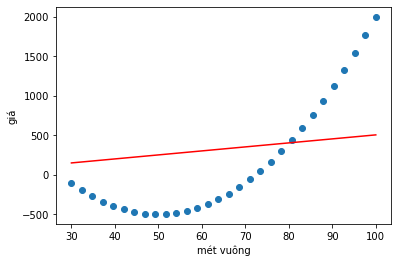

Giá nhà cho 50 m^2 là :  [252.89316042]
Giá nhà cho 100 m^2 là :  [506.22695496]
Giá nhà cho 150 m^2 là :  [759.56074949]


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
url = 'https://raw.githubusercontent.com/nttuan8/DL_Tutorial/master/L1/data_square.csv'
res = requests.get(url, allow_redirects=True)
with open('data_linear.csv','wb') as file:
    file.write(res.content)
data = pd.read_csv('data_linear.csv').values
N = data.shape[0]
x = data[:, 0].reshape(-1, 1)
y = data[:, 1].reshape(-1, 1)
plt.scatter(x, y)
plt.xlabel('mét vuông')
plt.ylabel('giá')

x = np.hstack((np.ones((N, 1)), x))

w = np.array([0.,1.]).reshape(-1,1)

numOfIteration = 100
cost = np.zeros((numOfIteration,1))
learning_rate = 0.000001
for i in range(1, numOfIteration):
    r = np.dot(x, w) - y
    cost[i] = 0.5*np.sum(r*r)
    w[0] -= learning_rate*np.sum(r)
    # correct the shape dimension
    w[1] -= learning_rate*np.sum(np.multiply(r, x[:,1].reshape(-1,1)))
    print(cost[i])
predict = np.dot(x, w)
plt.plot((x[0][1], x[N-1][1]),(predict[0], predict[N-1]), 'r')
plt.show()

x1 = 50
y1 = w[0] + w[1] * 50
print('Giá nhà cho 50 m^2 là : ', y1)
y2 = w[0] + w[1] * 100
print('Giá nhà cho 100 m^2 là : ', y2)
y3 = w[0] + w[1] * 150
print('Giá nhà cho 150 m^2 là : ', y3)

# Excercise 3

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
from sklearn.datasets import load_boston
housing_data = load_boston()
boston = pd.DataFrame(housing_data.data)
boston.columns = housing_data.feature_names
boston['Price'] = housing_data.target
boston.head()

C:\Users\linhh\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [8]:
# Creating Predictor variable 'X' and Target Variable 'y'

# X contains all the features except for the target value Price
X = boston.drop('Price', axis = 1)
y = boston['Price']

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=50)

# X_train contains 70% of total dataset
print(X_train.shape)
# X_test contains 30% of total dataset
print(X_test.shape)

(354, 13)
(152, 13)


# Creating and training Model

In [12]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
#Train/fit the model to training data
lr.fit(X_train,y_train)

LinearRegression()

In [13]:
# evaluate the model by checking out it's intercept and coefficients.
# print the intercept
print(lr.intercept_)

#Coefficients
coeff_df = pd.DataFrame(lr.coef_,X.columns,columns=['Coefficient'])
coeff_df

25.46952844276329


,Coefficient
CRIM,-0.102245
ZN,0.031104
INDUS,0.014369
CHAS,1.659646
NOX,-15.869391
RM,5.032224
AGE,-0.000716
DIS,-1.313538
RAD,0.255945
TAX,-0.012337


Text(0, 0.5, 'Predicted prices')

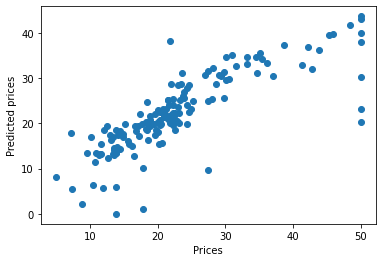

In [15]:
#predict from model
pred = lr.predict(X_test)
plt.scatter(y_test,pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")

In [16]:
#regression evaluation metrics
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 3.678977534499427
MSE: 33.868033996670015
RMSE: 5.819624901715747


In [17]:
pred

array([ 9.70536163e+00,  2.52526846e+01,  1.99563787e+01,  2.78890172e+01,
        2.22739530e+01,  2.32476003e+01,  1.62794573e+01,  1.69545473e+01,
        1.29304677e+01,  2.49423296e+01,  1.44246339e+01,  2.86653627e+01,
        1.76944262e+01,  3.46031656e+01,  1.85769591e+01,  1.35355785e+01,
        1.40027050e+01,  2.86569561e+01,  2.24340994e+01,  2.41506896e+01,
        2.40056244e+01,  3.72997269e+01,  3.06816250e+01,  1.93607196e+01,
        2.05776606e+01,  1.70641899e+01,  1.15241219e+01,  2.40849661e+01,
        3.10697041e+01,  2.36199284e+01,  2.10421914e+01,  5.88252060e+00,
        3.03053885e+01,  3.63167383e+01,  2.16908598e+01,  3.23510449e+01,
        3.46814402e+01,  2.07641740e+01,  2.85939847e+01,  4.01152089e+01,
        3.98810686e+01,  1.27048376e+01,  2.06620305e+01,  2.52423966e+01,
        2.08504892e+00,  1.46209833e+01,  2.22242105e+01,  3.48031883e+01,
        2.60939130e+01,  2.16408781e+01,  3.03883691e+01,  2.52756205e+01,
        1.50906276e+01,  